### This notebook shows a part of the text mining analysis which I am conducting for my master thesis. In this notebook, I am applying natural language processing techniques to analyse text reviews of fashion designer collections and to extract information.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.style as style
%matplotlib inline

import seaborn as sns

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import string

In [2]:
style.use("fivethirtyeight")

In [3]:
reviews=pd.read_csv("full reviews v2.csv")

In [4]:
reviews.head(2)

,ID,Year,Season,Collection Name,Designer ID,Designer Name,Collection link,Review text,length
0,1,2010,spring,spring-2010-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 6, 2009\nby SARAH MOWER\nIt coul...",2851
1,2,2011,spring,spring-2011-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 5, 2010\nby TIM BLANKS\nIt's har...",2011


#### The text data has been obtained from Vogue.com (from the collection links) using web scraping. Before the text analysis, I will apply some pre-processing to clean this data.

In [5]:
# renaming some columns
reviews = reviews.rename(columns={'length':'review_length','Review text':'review_text'})

In [6]:
reviews.head(2)

,ID,Year,Season,Collection Name,Designer ID,Designer Name,Collection link,review_text,review_length
0,1,2010,spring,spring-2010-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 6, 2009\nby SARAH MOWER\nIt coul...",2851
1,2,2011,spring,spring-2011-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 5, 2010\nby TIM BLANKS\nIt's har...",2011


In [7]:
reviews["review_length"].mean()

2277.996815286624

In [8]:
avg_len_designer=reviews.groupby(["Designer Name"])["review_length"].mean().reset_index()

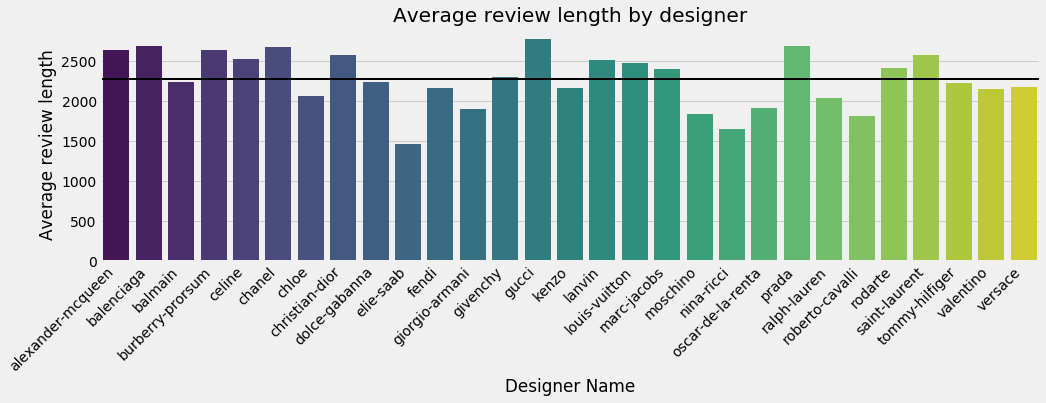

In [9]:
plt.figure(figsize=(15,4))
chart=sns.barplot(x="Designer Name", y="review_length", data=avg_len_designer, palette="viridis")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title('Average review length by designer')
plt.ylabel("Average review length")

chart.axhline(y = 2277, color='black', linewidth=2) # add average review length
chart

This graph shows that the collections of some designers receive much longer reviews (ex: Gucci, Prada, Chanel) than others (ex.: Elie-Saab and Nina Ricci). Further analysis with the features extracted through text and image mining could identify some of the differences between the collections.

## Cleaning the review text

In [10]:
reviews_text=reviews["review_text"]

#### First, I will remove the first words from each review about the location, date, and name of the editor. I define the function to find the position where the review text starts:

In [11]:
def find_2nd(string, substring="\n"):
    pos= string.find(substring, string.find(substring) + 1)
    return string[pos:]

In [12]:
new_reviews=reviews_text.apply(find_2nd)

In [13]:
new_reviews[1]

'\nIt\'s hard to conceive of a more thankless task in fashion than taking over from a designer as galvanizing as Alexander "Lee" McQueen, but Sarah Burton is precisely the kind of quiet powerhouse who has what it takes to grab hold of his legacy and drag it where it needs to go to survive and prosper. As much as she worked beside McQueen for 15 years and clearly had a symbiotic connection to his very particular vision, it\'s her gender that is her greatest asset and point of difference, at least as it shaped tonight\'s show. The very first outfit could stand as a manifesto for the future: The tail coat is a trad McQueen piece, but here it was softened, its edges unfinished, and the hard, peaked shoulders that were another McQueen signature had been slashed open, relaxed.\nBurton also softened the staging, a concept that was always so critical to a McQueen show. Where his narratives were often dark, discomfiting things, she opted for a nurturing atmosphere: a pagan, Earth-Mother-ly spir

In [14]:
reviews["new_reviews"]=new_reviews

#### Now to the text cleaning:

In [15]:
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [16]:
# text cleaning functions
def stopwords_punctuation(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation] 
    
    # remove the special pause line that is not contained in the default punctuation set
    nopunc = [" " if char=="—" else char for char in nopunc]
    
    
    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)                                           
    
    # Now just remove any stopwords
    nostopwords= [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
    nostopwords=" ".join(nostopwords)
    
    return nostopwords

def remove_numbers(text):
    output_string = ""
    for char in text:
        if not char.isdigit():
            output_string = output_string + char
    return output_string

def remove_whitespace(text):
    return " ".join(text.split())

def stem_sentence(sentence):
    englishStemmer=SnowballStemmer("english")
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in token_words:
        if len(word)>2:
            stem_sentence.append(englishStemmer.stem(word))
            stem_sentence.append(" ")
    return "".join(stem_sentence)

def sequence_process(text):
    _steps = [
    stopwords_punctuation,
    remove_numbers,
    remove_whitespace,
    stem_sentence
]
    
    for step in _steps:
        text=step(text)
    return text  

#### We can now apply the sequence of transformations to each review:

In [17]:
clean_text = []

for i in new_reviews:
    clean_text.append(sequence_process(i)) 

In [18]:
clean_text[2] # example of a cleaned text

'day began prospero aquat sorceri chanel end differ kind underwat magic alexand mcqueen lagerfeld model nymph sarah burton goddess base collect three grès pleat drape gaudí architectur gaia sens allencompass ocean life infus cloth like outfit compos coral shell incred engin matelassé jacquard barnacl pattern silk chiffon oyster print layer cut circl rib though hard even begin explain complex result carri analog still black leather appliqué infect lace dress could oil slick fortunypl organza woven copper silver gold like pirat buri treasur detail cloth obsess conceiv realiz could easili sunk cloth happen lee mcqueen burton alreadi kudo woman touch liter lift collect rais waist exagger empir line ruffl undul model walk like jellyfish move sea said design strike apricot babi doll one burton person favorit vein compar movement trapez dress swim anoth dress pale ruffl fragil peignoir roll like surf collect prove hotwir core mcqueen burton truli color palett transluc insid shell kind unambig

In [19]:
reviews["clean_reviews"] = clean_text

In [ ]:
# saving the cleaned review data for further analysis
reviews.to_csv("full_reviews_clean.csv", index=False)

In [ ]:
### ----- Load the cleaned review data

In [20]:
reviews=pd.read_csv("full_reviews_clean.csv")

In [21]:
reviews.head(2)

,ID,Year,Season,Collection Name,Designer ID,Designer Name,Collection link,review_text,review_length,new_reviews,clean_reviews
0,1,2010,spring,spring-2010-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 6, 2009\nby SARAH MOWER\nIt coul...",2851,"\nIt could be that Alexander McQueen—oh, and L...",could alexand mcqueen ladi gaga remot crash wh...
1,2,2011,spring,spring-2011-ready-to-wear,1,alexander-mcqueen,https://www.vogue.com/fashion-shows/spring-201...,"PARIS,OCTOBER 5, 2010\nby TIM BLANKS\nIt's har...",2011,\nIt's hard to conceive of a more thankless ta...,hard conceiv thankless task fashion take desig...


## Sentiment Analysis of Texts

In [22]:
from textblob import TextBlob

In [23]:
# example for Review 3
example_review=TextBlob(reviews['clean_reviews'].iloc[3])
score = example_review.sentiment
score

Sentiment(polarity=0.14257575757575758, subjectivity=0.46969696969696983)

In [24]:
def get_polarity_score(text):
    score=TextBlob(text).sentiment.polarity
    return score

In [39]:
reviews["Polarity Score"]=reviews["clean_reviews"].apply(get_polarity_score)

In [40]:
reviews["Polarity Score"]

0      0.108258
1      0.080687
2     -0.048500
3      0.142576
4      0.082616
         ...   
623    0.165181
624    0.110238
625    0.069775
626    0.212011
627    0.162061
Name: Polarity Score, Length: 628, dtype: float64

Text(0.5, 0, 'Polarity Score')

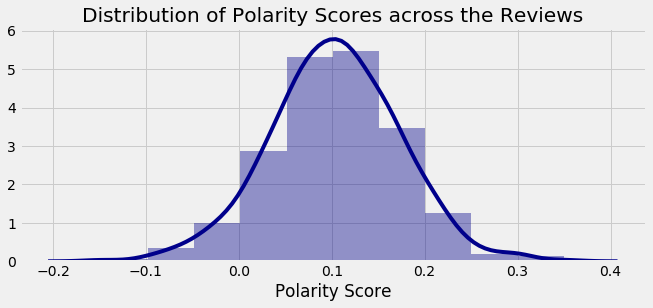

In [41]:
plt.figure(figsize=(10,4))

sns.distplot(reviews["Polarity Score"], bins=10, kde=True, color="darkblue")
plt.title('Distribution of Polarity Scores across the Reviews')
plt.xlabel("Polarity Score")


This graph shows that polarity scores vary across the reviews, from more negative reviews (-0.2 and negative values) to positive reviews (positive values and up to 0.4 in this case). As the reviews are written by an expert in a prestigious publication, the language used is still relatively objective which explains why we don't see extreme polarity scores (-1 or 1). 

Let's look at the best and worst collections judged by the polarity of the text commentaries:

#### Top and bottom polarity scores

In [43]:
reviews.sort_values('Polarity Score',ascending=False)[['ID','Collection Name','Designer Name', 'Polarity Score']].head(5)

,ID,Collection Name,Designer Name,Polarity Score
137,138,spring-2016-ready-to-wear,chloe,0.349811
522,523,fall-2020-ready-to-wear,roberto-cavalli,0.305208
154,155,spring-2011-ready-to-wear,christian-dior,0.301786
226,227,spring-2017-ready-to-wear,fendi,0.300877
425,426,spring-2019-ready-to-wear,nina-ricci,0.297143


In [44]:
reviews.sort_values('Polarity Score',ascending=True)[['ID','Collection Name','Designer Name', 'Polarity Score']].head(5)

,ID,Collection Name,Designer Name,Polarity Score
45,46,spring-2011-ready-to-wear,balmain,-0.147619
558,559,fall-2012-ready-to-wear,saint-laurent,-0.101515
262,263,fall-2020-ready-to-wear,giorgio-armani,-0.089583
602,603,fall-2017-ready-to-wear,valentino,-0.084357
476,477,fall-2015-ready-to-wear,prada,-0.081562


## Top Words 


In [220]:
review_text = reviews["clean_reviews"]
ls= []

for i in review_text:
    ls.append(str(i).split())


In [221]:
from nltk.probability import FreqDist
fdist = FreqDist()
for sentence in ls:
    for token in sentence:
        fdist[token] +=1

In [222]:
top_words = fdist.most_common(10)

In [ ]:
ls = []
for i in top_words:
    ls.append({'Word': i[0], 'Num': i[1]})

df = pd.DataFrame(ls)

Text(0.5, 0, 'Ocurrences')

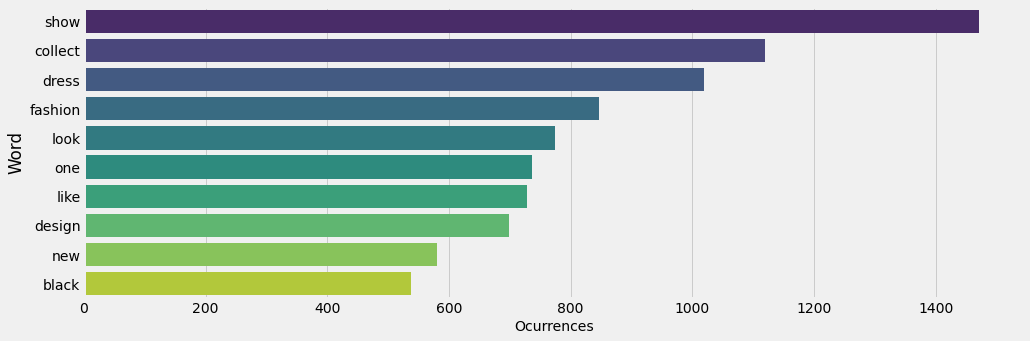

In [230]:
plt.figure(figsize=(15,5))

sns.barplot(data = df, y = 'Word', x = 'Num',palette="viridis")
plt.xlabel('Ocurrences', fontsize=14)

## Wordclouds

In [ ]:
from wordcloud import WordCloud

In [ ]:
review_text = reviews["clean_reviews"]
all_words = " ".join(review for review in review_text)

(-0.5, 1599.5, 799.5, -0.5)

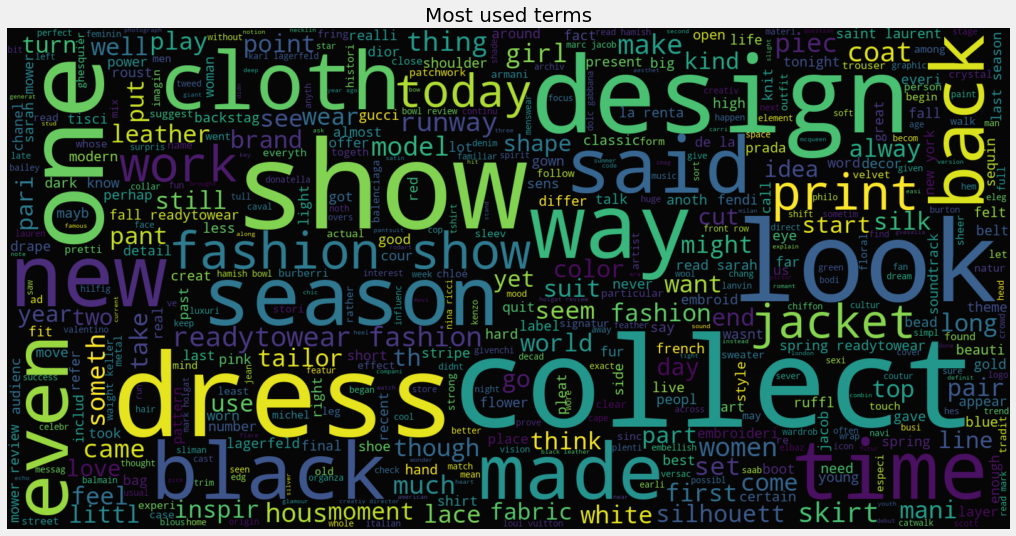

In [25]:
plt.figure(figsize=(16,13))
wc = WordCloud(background_color="black", max_words=500, max_font_size= 200,  width=1600, height=800)
wc.generate(all_words)
plt.title("Most used terms", fontsize=20)
plt.imshow(wc.recolor( colormap= 'viridis' , random_state=17), alpha=0.98, interpolation="bilinear", )
plt.axis('off')

#### The wordcloud shows that the most used words refer to the fashion lexicon: dress, collection, print, cloth etc.

#### Let's look at an individual review to see what the wordcloud reveals: from this we can identify important features related to the collection: 
- fabrics (satin, wool), 
- items (dress, suit),
- color (black, fuchsia), 
- potential inspiration or motifs (rose, flower).

In [33]:
text_example=review_text[20]

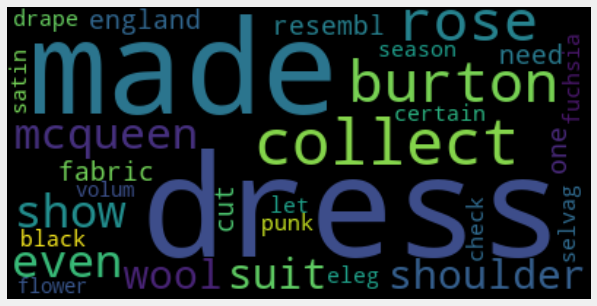

In [34]:
wordcloud=WordCloud(background_color="black",max_words=30).generate(text_example)
plt.figure(figsize=(10,5))
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Topic Modelling with LDA

As seen in the wordclouds, we can identify different topics in the reviews (such as colors, or fabrics, or themes etc). I now use the LDA algorithm to categorise the words into topics.

In [42]:
# Packages used for LDA modeling
import gensim
from gensim import models
from gensim.corpora import Dictionary

In [9]:
text = reviews["clean_reviews"]

In [10]:
corpus = [text.iloc[i].split() for i in range(text.shape[0])]  #separate each review into words

In [11]:
text = pd.DataFrame({"Words": corpus})
text.head(2)

,Words
0,"[could, alexand, mcqueen, ladi, gaga, remot, c..."
1,"[hard, conceiv, thankless, task, fashion, take..."


In [256]:
dictionary = gensim.corpora.Dictionary(text["Words"])
print("Before removing, the number of distinct words is: {}".format(len(dictionary)))

Before removing, the number of distinct words is: 14366


In [257]:
dictionary.filter_extremes( no_above=0.7, no_below=40)
print("After removing extreme rare or common words, the number of distinct words is: {}".format(len(dictionary)))

After removing extreme rare or common words, the number of distinct words is: 534


#### Doc-term matrix

In [258]:
bow = [dictionary.doc2bow(doc) for doc in text["Words"]]

In [259]:
example_doc = bow[20]

for i in range(10):
    print("Word {} (\"{}\") appears {} time.".format(example_doc[i][0], 
                                                     dictionary[example_doc[i][0]], 
                                                     example_doc[i][1]))

Word 2 ("audienc") appears 1 time.
Word 5 ("black") appears 2 time.
Word 10 ("chang") appears 1 time.
Word 12 ("come") appears 1 time.
Word 14 ("cut") appears 3 time.
Word 18 ("edg") appears 1 time.
Word 20 ("fabric") appears 3 time.
Word 22 ("first") appears 1 time.
Word 25 ("get") appears 1 time.
Word 28 ("head") appears 1 time.


#### Estimating LDA Model

In [265]:
lda_model = gensim.models.ldamodel.LdaModel(corpus=bow,
                                           id2word=dictionary,
                                           num_topics=15, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=1,
                                           per_word_topics=True,)

In [266]:
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.021*"design" + 0.015*"one" + 0.014*"black" + 0.014*"gold" + 0.013*"even" + 0.012*"gown" + 0.011*"rose" + 0.011*"red" + 0.010*"differ" + 0.010*"way"
Topic: 1 
Words: 0.014*"imagin" + 0.013*"even" + 0.013*"embroid" + 0.013*"like" + 0.012*"platform" + 0.011*"made" + 0.011*"silk" + 0.011*"read" + 0.011*"time" + 0.010*"light"
Topic: 2 
Words: 0.019*"one" + 0.016*"jean" + 0.015*"new" + 0.014*"saint" + 0.012*"skirt" + 0.012*"design" + 0.012*"full" + 0.012*"wardrob" + 0.011*"black" + 0.011*"season"
Topic: 3 
Words: 0.020*"way" + 0.013*"season" + 0.011*"like" + 0.010*"drape" + 0.010*"even" + 0.010*"walk" + 0.010*"one" + 0.010*"there" + 0.010*"film" + 0.010*"era"
Topic: 4 
Words: 0.018*"oscar" + 0.016*"brand" + 0.014*"new" + 0.012*"design" + 0.012*"idea" + 0.012*"real" + 0.011*"one" + 0.011*"season" + 0.011*"black" + 0.010*"though"
Topic: 5 
Words: 0.018*"hous" + 0.014*"way" + 0.014*"made" + 0.012*"design" + 0.012*"present" + 0.012*"time" + 0.011*"said" + 0.011*"like" + 0.011*

## Doc2Vec - to find related reviews (and collections)


In [271]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [268]:
w2v= []#create list of lists for word2vec

for i in reviews["clean_reviews"]:
    w2v.append(str(i).split())

In [272]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(w2v)]

In [274]:
doc2vec = Doc2Vec(documents=documents,
                dm=1,
                vector_size=300,
                window_size=10,
                epochs = 50,
                min_count=1,
                negative=5,
                sample=10e-6,
                min_alpha=0.0001,
                alpha=0.025)

In [284]:
tokens = ('mediterranean style').split()  # Input search term

new_vector = doc2vec.infer_vector(tokens)
sims = doc2vec.docvecs.most_similar([new_vector])
sims[:5] # now we can see the indices of the most similar collections

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


[(219, 0.999744176864624),
 (217, 0.9997397661209106),
 (549, 0.9997393488883972),
 (251, 0.9997376799583435),
 (624, 0.9997369050979614)]

In [285]:
articles = [i[0] for i in sims]

In [286]:
pd.options.display.max_colwidth = 100

reviews.iloc[articles]['clean_reviews'] # collections which are related to the passed string above

219    season wispi fabric ivori ecru offpastel fray edg fendi go ad parisian lingeri twist look karl l...
217    adroit mix season twist floorfil compil crowdpleas elev womenswear standard mastermind eli saab ...
549    edi campbel didnt alreadi exist hedi sliman would sure redirect kere fundag make lab somewher su...
251    titl earth giorgio armani collect began design expert cultiv manicur territori suit two grieg br...
624    question hang issu whether possibl show fullon nasti woman sexi compassion time donatella versac...
548    year dior homm hedi sliman alway knew creat sens occas womenswear debut newli rechristen saint l...
60     olivi roust child look back pari season era tight hold design moment might someth duel ysl biopi...
338    photo bruno sialelli end set time got pit lost audienc feet hustl door feel although ultim show ...
469    gasp factor prada show tonight vast new multipurpos perform space fondazion prada open sat infla...
391    park avenu armori pitchdark sa